<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [371]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [372]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-02-16 15:15:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-02-16 15:15:17 (110 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [373]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [374]:
df.shape

(346, 10)

In [375]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


### Convert to date time object


In [376]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [377]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


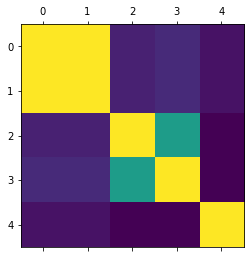

In [378]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()


Let's plot some columns to underestand data better:


In [379]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y
import seaborn as sns
print(sns.__version__)

0.10.1


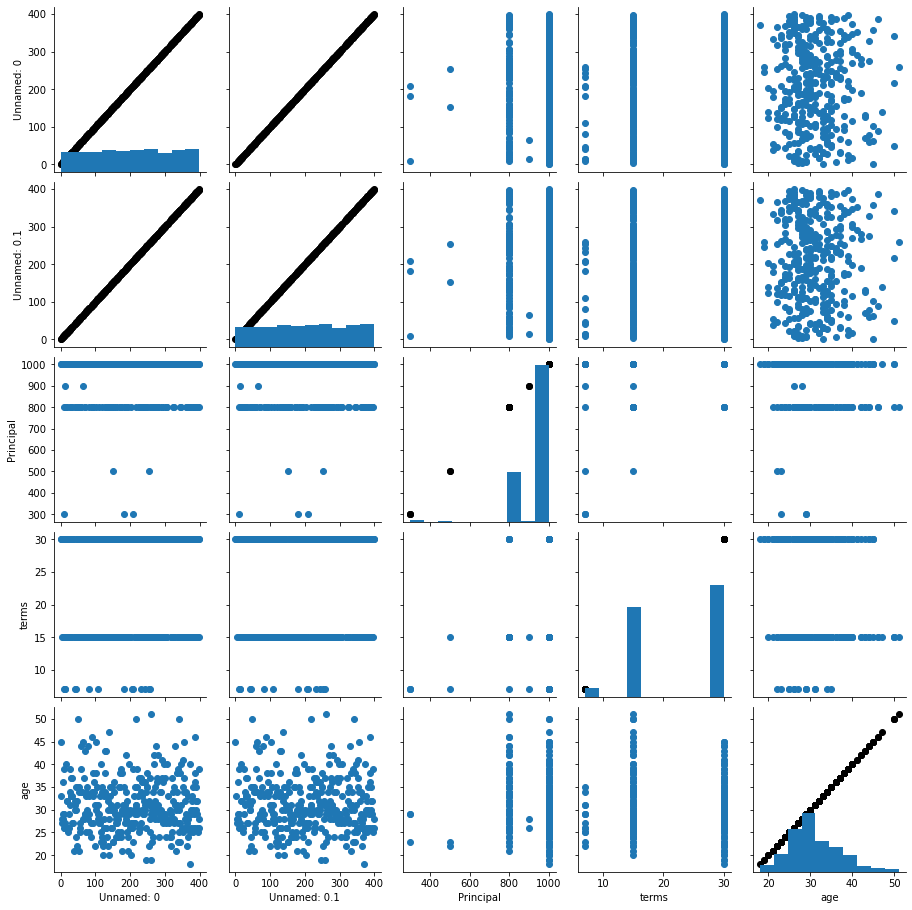

In [380]:
g = sns.PairGrid(df, despine=True, dropna=True)
def scatter_fake_diag(x, y, *a, **kw):
    if x.equals(y):
        kw["color"] = (0, 0, 0, 1)
    plt.scatter(x, y, *a, **kw)

g.map(scatter_fake_diag)
g.map_diag(plt.hist)

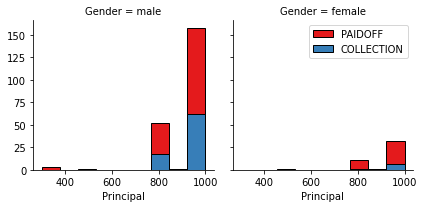

In [381]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

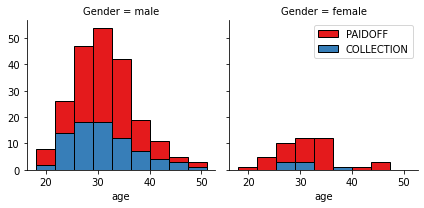

In [382]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


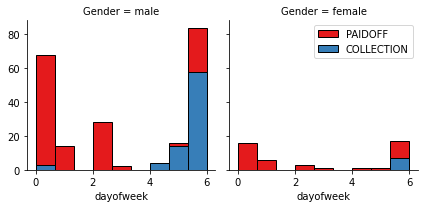

In [383]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [384]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [385]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [386]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [387]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [388]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [389]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


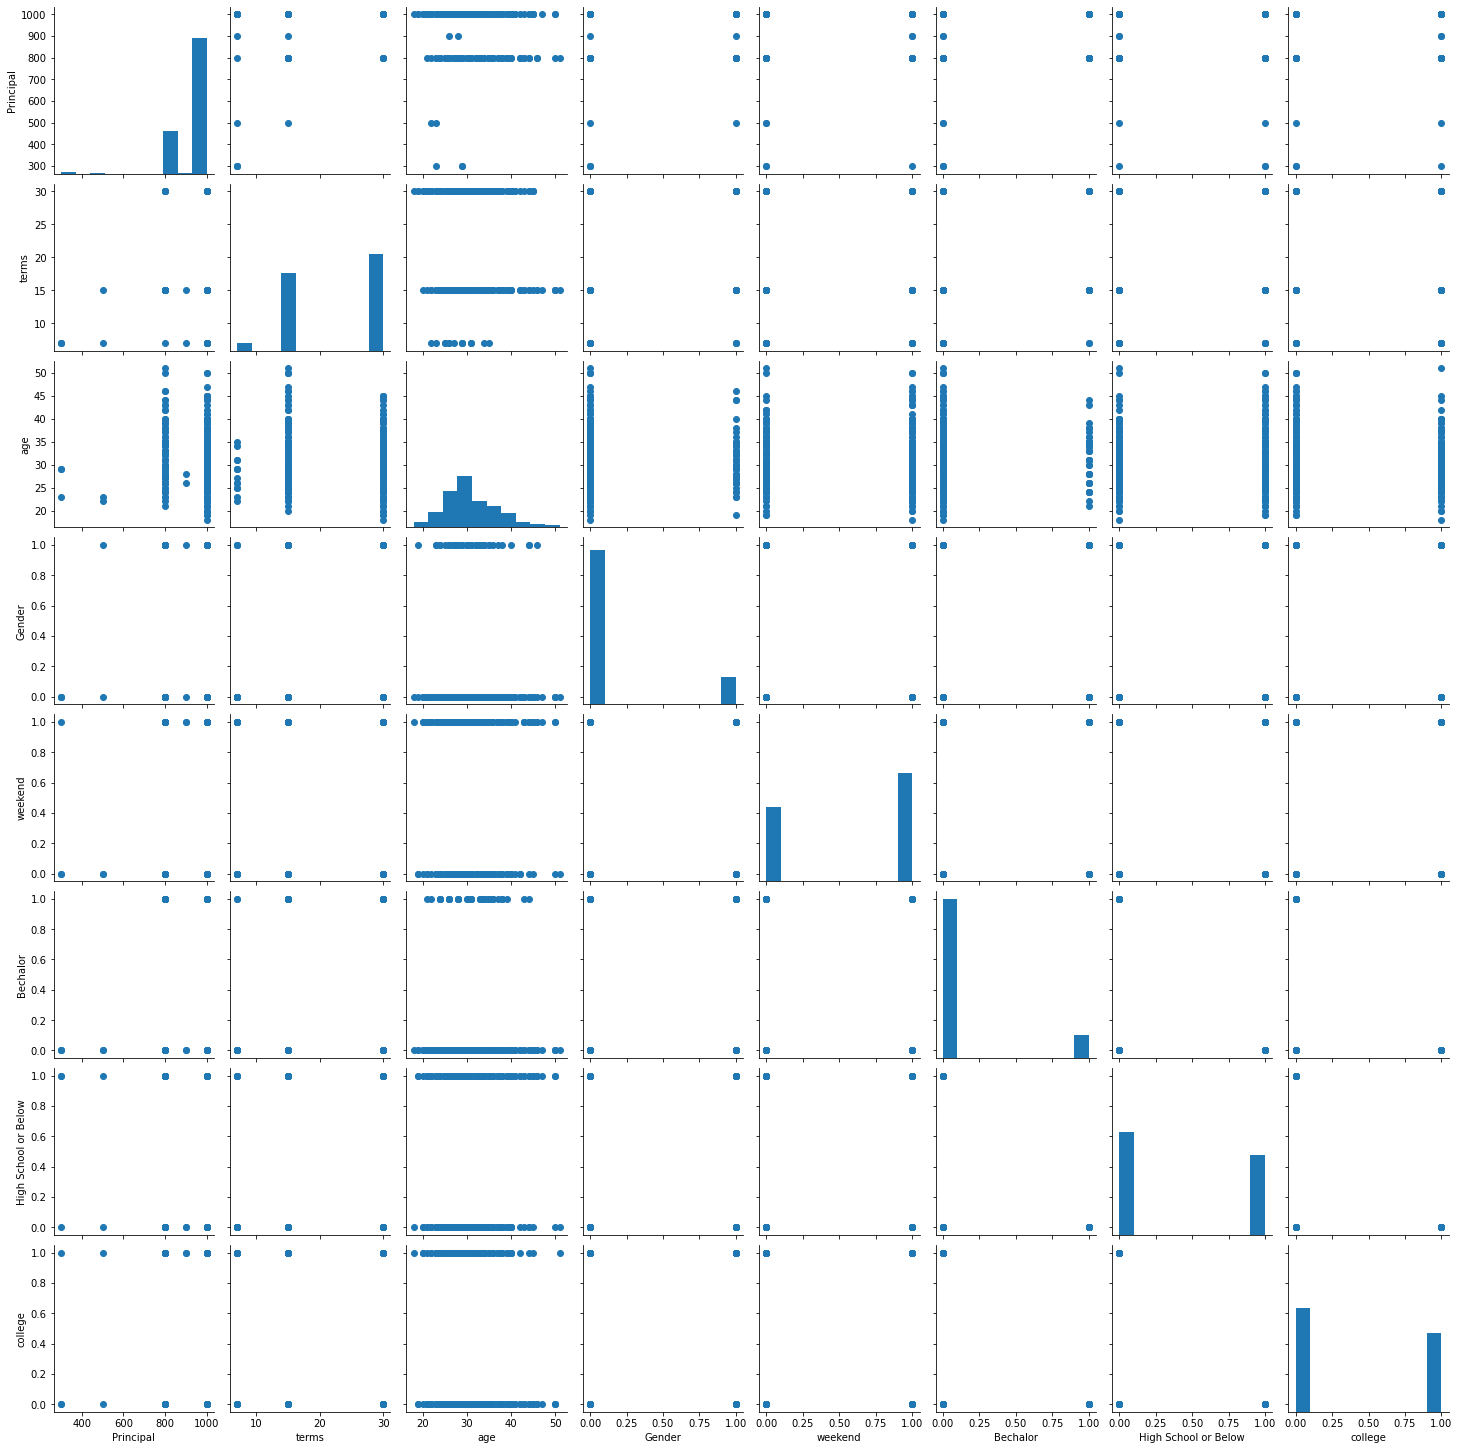

In [410]:
g = sns.PairGrid(Feature, despine=True, dropna=True)
def scatter_fake_diag(x, y, *a, **kw):
    if x.equals(y):
        kw["color"] = (0, 0, 0, 0)
    plt.scatter(x, y, *a, **kw)

g.map(scatter_fake_diag)
g.map_diag(plt.hist)

### Feature Selection


Let's define feature sets, X:


In [390]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [391]:
y = np.array(df['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0, 1]))
y_labelled = np.array(df['loan_status'])
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [392]:
StdScaler = preprocessing.StandardScaler().fit(X)
X = np.array(StdScaler.transform(X))
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [274]:
from sklearn.model_selection import StratifiedKFold

# 5 elements stratified splits -> train 80% validate 20% for the training with Kfold cross validation (kF_CV)to assess the results
N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=12)
skf.get_n_splits(X, y)
skf

StratifiedKFold(n_splits=5, random_state=12, shuffle=True)

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# limit of K (= n_neighbors parameter) to test : 1 --> 24
Ks = 24

# Init strorage of scores for each k
KNN_acc = np.zeros((Ks))
KNN_pre = np.zeros((Ks))
KNN_rec = np.zeros((Ks))
KNN_jac = np.zeros((Ks))
KNN_f1s = np.zeros((Ks))
KNN_f2s = np.zeros((Ks))

for k in range(1, Ks+1) :
    # Init storage of scores for each split on current k (CrossVal)
    cross_acc = np.zeros((N))
    cross_pre = np.zeros((N))
    cross_rec = np.zeros((N))
    cross_jac = np.zeros((N))
    cross_f1s = np.zeros((N))
    cross_f2s = np.zeros((N))
    n = 0
    for train_index, val_index in skf.split(X, y) :
        # train on current train set and retrieve predictions on current validation set
        p_val = KNeighborsClassifier(n_neighbors=k).fit(X[train_index], y[train_index]).predict(X[val_index])
        # Store scores on validation set for current split option
        cross_acc[n] = metrics.accuracy_score(y[val_index], p_val)
        cross_pre[n] = metrics.precision_score(y[val_index], p_val)
        cross_rec[n] = metrics.recall_score(y[val_index], p_val)
        cross_jac[n] = metrics.jaccard_score(y[val_index], p_val)
        cross_f1s[n] = metrics.f1_score(y[val_index], p_val)
        cross_f2s[n] = metrics.fbeta_score(y[val_index], p_val, beta=2)
        n = n + 1
    # caluclate the average of the stored scores on all considered split options for current k (CrossVal)
    KNN_acc[k-1] = np.mean(cross_acc)
    KNN_pre[k-1] = np.mean(cross_pre)
    KNN_rec[k-1] = np.mean(cross_rec)
    KNN_jac[k-1] = np.mean(cross_jac)
    KNN_f1s[k-1] = np.mean(cross_f1s)
    KNN_f2s[k-1] = np.mean(cross_f2s)

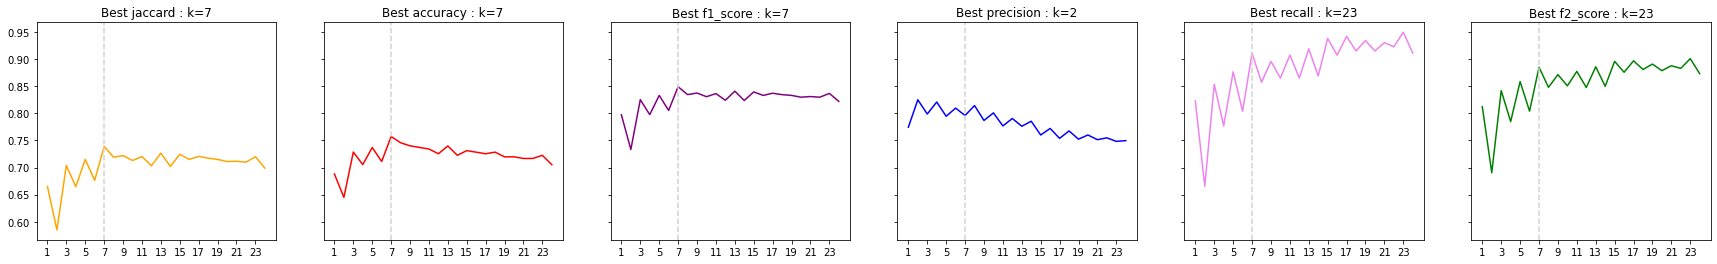

In [276]:
# visual marker for the graphs (to be updated at replay of the cell)
Xline = 7

# plot the scores with respect to the considered k values to identify the best K
fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(30,4))
axs[0].plot(range(1, Ks+1), KNN_jac, 'orange')
axs[0].set_title("Best jaccard : k="+str(np.argmax(KNN_jac)+1))
axs[0].set_xticks(range(1, Ks+1, 2))
axs[0].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[1].plot(range(1, Ks+1), KNN_acc, 'red')
axs[1].set_title("Best accuracy : k="+str(np.argmax(KNN_acc)+1))
axs[1].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[2].plot(range(1, Ks+1), KNN_f1s, 'purple')
axs[2].set_title("Best f1_score : k="+str(np.argmax(KNN_f1s)+1))
axs[2].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[3].plot(range(1, Ks+1), KNN_pre, 'blue')
axs[3].set_title("Best precision : k="+str(np.argmax(KNN_pre)+1))
axs[3].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[4].plot(range(1, Ks+1), KNN_rec, 'violet')
axs[4].set_title("Best recall : k="+str(np.argmax(KNN_rec)+1))
axs[4].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[5].plot(range(1, Ks+1), KNN_f2s, 'green')
axs[5].set_title("Best f2_score : k="+str(np.argmax(KNN_f2s)+1))
axs[5].axvline(x=Xline, color='lightgrey', linestyle="--")
plt.show()

In [340]:
# The best parameter value for n_neighbor is 7. Let's use it :
# Training on the full train set with best K parameter setting 7
best_KNN = KNeighborsClassifier(n_neighbors=7).fit(X, y)

# Evaluate the full training scores on training set
full_train_pred = best_KNN.predict(X)
print("Best KNN _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best KNN _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best KNN _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best KNN _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best KNN _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best KNN _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))

Best KNN _ full Train set Jaccard:  0.7850162866449512
Best KNN _ full Train set Accuracy:  0.8092485549132948
Best KNN _ full Train set f1-Score:  0.8795620437956204
Best KNN _ full Train set Precision:  0.8368055555555556
Best KNN _ full Train set Recall:  0.926923076923077
Best KNN _ full Train set f2-Score:  0.907379518072289


In [341]:
# Print the classification report
np.set_printoptions(precision=2)
print(metrics.classification_report(y, full_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        86
           1       0.84      0.93      0.88       260

    accuracy                           0.81       346
   macro avg       0.75      0.69      0.71       346
weighted avg       0.80      0.81      0.80       346



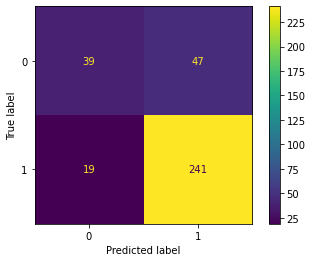

In [342]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_KNN, X, y)

# Decision Tree


In [294]:
from sklearn.tree import DecisionTreeClassifier

# limit of D (depth) to test : 1 --> 60
Ds = 60

# Init strorage of scores for each d
DTC_acc = np.zeros((Ds))
DTC_pre = np.zeros((Ds))
DTC_rec = np.zeros((Ds))
DTC_jac = np.zeros((Ds))
DTC_f1s = np.zeros((Ds))
DTC_f2s = np.zeros((Ds))

for d in range(1, Ds+1) :
    # Init storage of scores for each split on current d
    cross_acc = np.zeros((N))
    cross_pre = np.zeros((N))
    cross_rec = np.zeros((N))
    cross_jac = np.zeros((N))
    cross_f1s = np.zeros((N))
    cross_f2s = np.zeros((N))
    n = 0
    for train_index, val_index in skf.split(X, y) :
        # train on current train set and retrieve predictions on current validation set
        p_val = DecisionTreeClassifier(criterion="entropy", max_depth=d).fit(X[train_index], y[train_index]).predict(X[val_index])
        # Store scores on validation set for current split option
        cross_acc[n] = metrics.accuracy_score(y[val_index], p_val)
        cross_pre[n] = metrics.precision_score(y[val_index], p_val)
        cross_rec[n] = metrics.recall_score(y[val_index], p_val)
        cross_jac[n] = metrics.jaccard_score(y[val_index], p_val)
        cross_f1s[n] = metrics.f1_score(y[val_index], p_val)
        cross_f2s[n] = metrics.fbeta_score(y[val_index], p_val, beta=2)
        n = n + 1
    # caluclate the average of the stored scores on all considered split options for current k
    DTC_acc[d-1] = np.mean(cross_acc)
    DTC_pre[d-1] = np.mean(cross_pre)
    DTC_rec[d-1] = np.mean(cross_rec)
    DTC_jac[d-1] = np.mean(cross_jac)
    DTC_f1s[d-1] = np.mean(cross_f1s)
    DTC_f2s[d-1] = np.mean(cross_f2s)

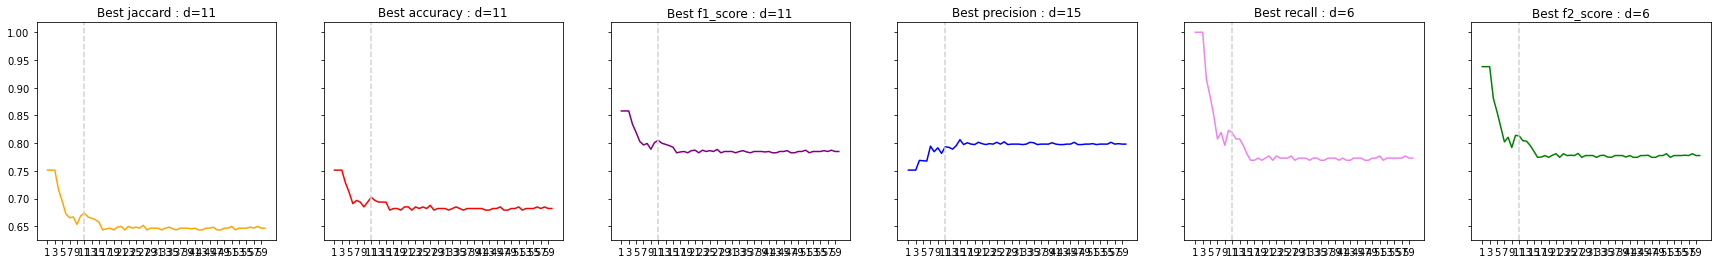

In [320]:
# visual marker for the graphs (to be updated at replay of the cell)
Xline = 11

# plot the scores with respect to the considered k values to identify the best D depth
# with assumption of bigger=better if several maximums

# fist solution with depth = 3 to maximize second optimum at 11

fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(30,4))
axs[0].plot(range(1, Ds+1), DTC_jac, 'orange')
axs[0].set_title("Best jaccard : d="+str(np.max([i for i,j in enumerate(DTC_jac) if j==np.max(DTC_jac[5:])])+1))
axs[0].set_xticks(range(1, Ds+1, 2))
axs[0].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[1].plot(range(1, Ds+1), DTC_acc, 'red')
axs[1].set_title("Best accuracy : d="+str(np.max([i for i,j in enumerate(DTC_acc) if j==np.max(DTC_acc[5:])])+1))
axs[1].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[2].plot(range(1, Ds+1), DTC_f1s, 'purple')
axs[2].set_title("Best f1_score : d="+str(np.max([i for i,j in enumerate(DTC_f1s) if j==np.max(DTC_f1s[5:])])+1))
axs[2].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[3].plot(range(1, Ds+1), DTC_pre, 'blue')
axs[3].set_title("Best precision : d="+str(np.max([i for i,j in enumerate(DTC_pre) if j==np.max(DTC_pre[5:])])+1))
axs[3].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[4].plot(range(1, Ds+1), DTC_rec, 'violet')
axs[4].set_title("Best recall : d="+str(np.max([i for i,j in enumerate(DTC_rec) if j==np.max(DTC_rec[5:])])+1))
axs[4].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[5].plot(range(1, Ds+1), DTC_f2s, 'green')
axs[5].set_title("Best f2_score : d="+str(np.max([i for i,j in enumerate(DTC_f2s) if j==np.max(DTC_f2s[5:])])+1))
axs[5].axvline(x=Xline, color='lightgrey', linestyle="--")
plt.show()

In [343]:
# The 11 optimum DTC does not always answer PAIDOFF as the 3 does (see below)
best_DTC = DecisionTreeClassifier(criterion="entropy", max_depth=11).fit(X,y)
full_train_pred = best_DTC.predict(X)
print("Best DTC _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best DTC _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best DTC _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best DTC _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best DTC _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best DTC _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))

Best DTC _ full Train set Jaccard:  0.8385964912280702
Best DTC _ full Train set Accuracy:  0.8670520231213873
Best DTC _ full Train set f1-Score:  0.9122137404580152
Best DTC _ full Train set Precision:  0.9053030303030303
Best DTC _ full Train set Recall:  0.9192307692307692
Best DTC _ full Train set f2-Score:  0.9164110429447853


In [344]:
# Print the classification report
np.set_printoptions(precision=2)
print(metrics.classification_report(y, full_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        86
           1       0.91      0.92      0.91       260

    accuracy                           0.87       346
   macro avg       0.82      0.81      0.82       346
weighted avg       0.87      0.87      0.87       346



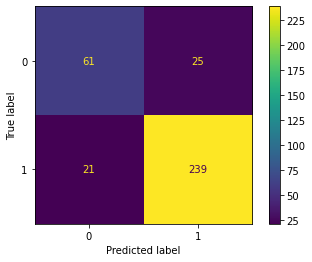

In [345]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_DTC, X, y)

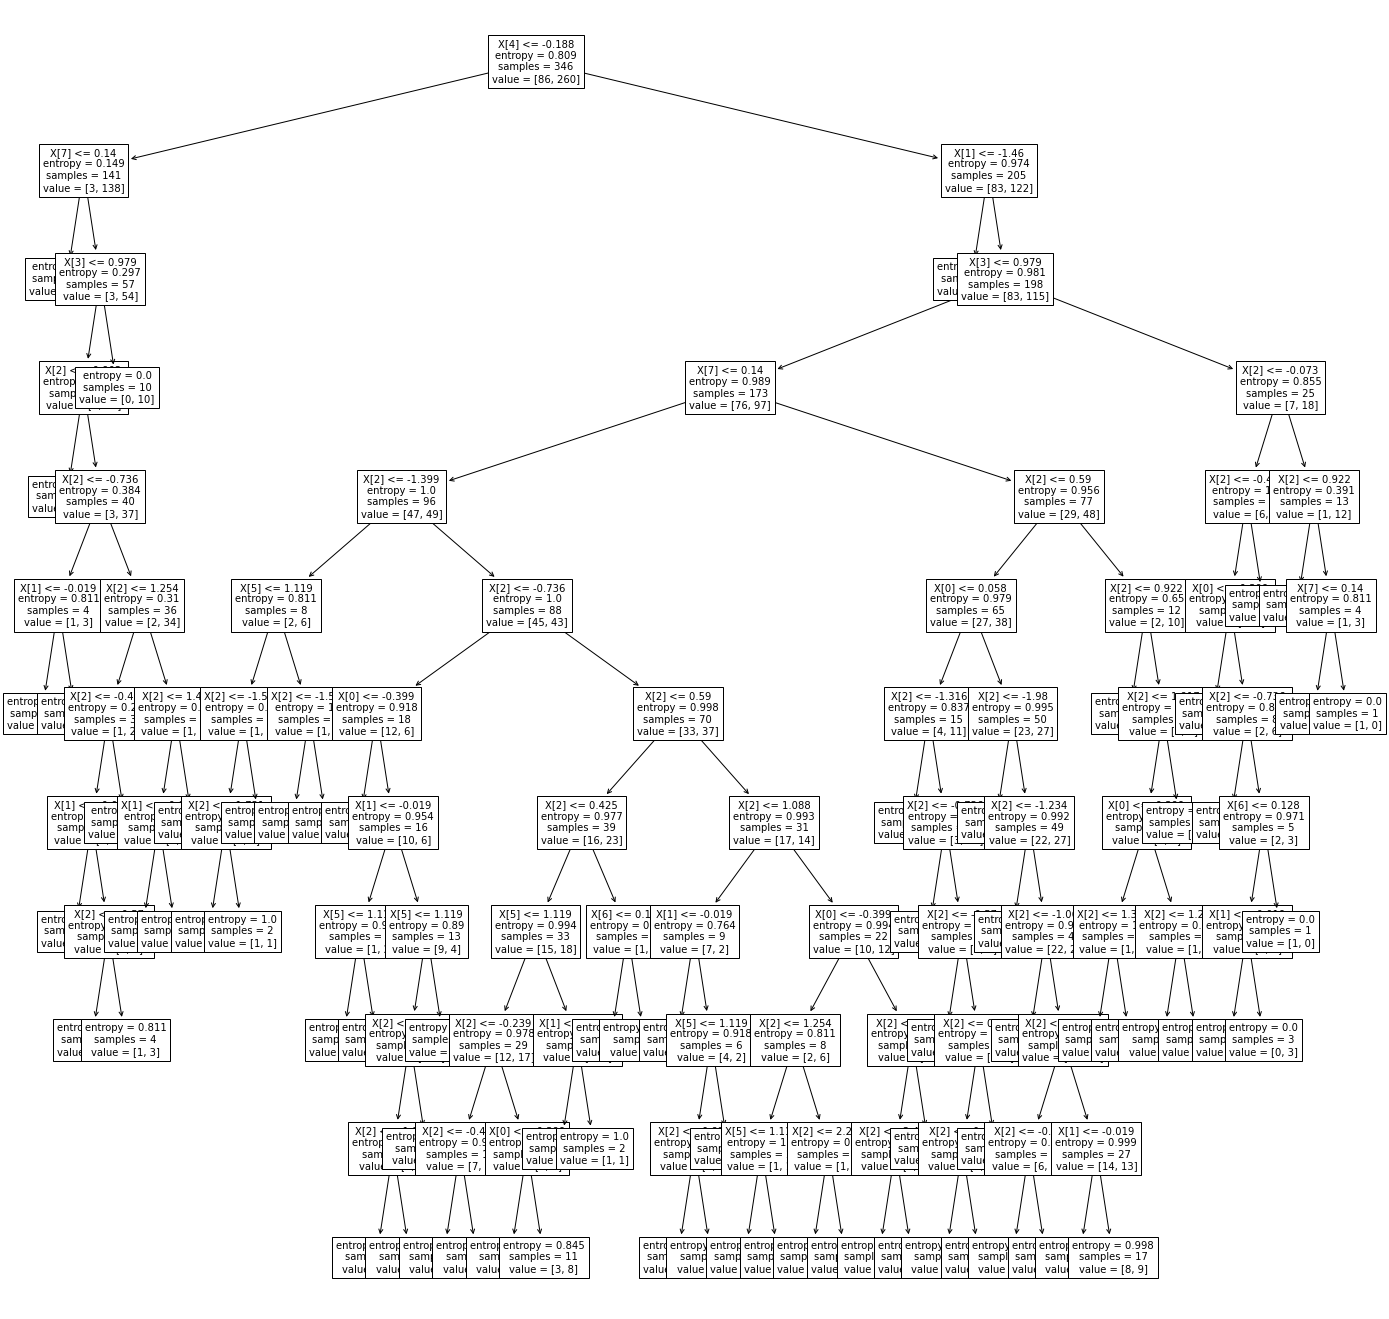

In [322]:
from sklearn import tree
plt.figure(figsize=(24, 24))
tree.plot_tree(best_DTC, fontsize=10)
plt.show()

In [346]:
small_DTC = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X, y)
full_train_pred = small_DTC.predict(X)
print("Best DTC _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best DTC _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best DTC _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best DTC _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best DTC _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best DTC _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))

Best DTC _ full Train set Jaccard:  0.7514450867052023
Best DTC _ full Train set Accuracy:  0.7514450867052023
Best DTC _ full Train set f1-Score:  0.858085808580858
Best DTC _ full Train set Precision:  0.7514450867052023
Best DTC _ full Train set Recall:  1.0
Best DTC _ full Train set f2-Score:  0.937950937950938


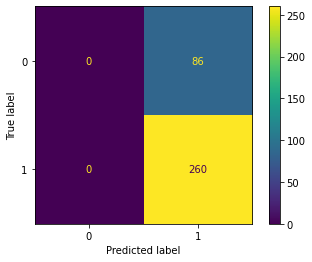

In [347]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(small_DTC, X, y)

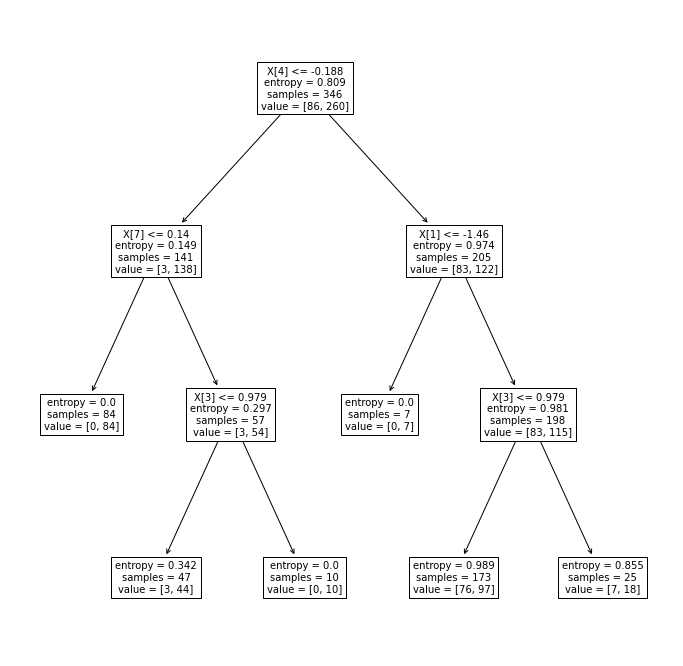

In [348]:
plt.figure(figsize=(12, 12))
tree.plot_tree(small_DTC, fontsize=10)
plt.show()

In [349]:
NoDepth_DTC = DecisionTreeClassifier(criterion="entropy").fit(X,y)
full_NoDepth_pred = NoDepth_DTC.predict(X)
print("NoD DTC _ full NoDepth set Jaccard: ", metrics.jaccard_score(y, full_NoDepth_pred))
print("NoD DTC _ full NoDepth set Accuracy: ", metrics.accuracy_score(y, full_NoDepth_pred))
print("NoD DTC _ full NoDepth set f1-Score: ", metrics.f1_score(y, full_NoDepth_pred))
print("NoD DTC _ full NoDepth set Precision: ", metrics.precision_score(y, full_NoDepth_pred))
print("NoD DTC _ full NoDepth set Recall: ", metrics.recall_score(y, full_NoDepth_pred))
print("NoD DTC _ full NoDepth set f2-Score: ", metrics.fbeta_score(y, full_NoDepth_pred, beta=2))

NoD DTC _ full NoDepth set Jaccard:  0.8634686346863468
NoD DTC _ full NoDepth set Accuracy:  0.8930635838150289
NoD DTC _ full NoDepth set f1-Score:  0.9267326732673267
NoD DTC _ full NoDepth set Precision:  0.9551020408163265
NoD DTC _ full NoDepth set Recall:  0.9
NoD DTC _ full NoDepth set f2-Score:  0.9105058365758756


In [350]:
# Print the classification report
np.set_printoptions(precision=2)
print(metrics.classification_report(y, full_NoDepth_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        86
           1       0.96      0.90      0.93       260

    accuracy                           0.89       346
   macro avg       0.85      0.89      0.86       346
weighted avg       0.90      0.89      0.90       346



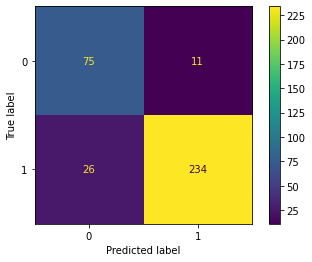

In [351]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(NoDepth_DTC, X, y)

# Support Vector Machine


In [352]:
from sklearn import svm


# list of kernels with list of degrees for 'poly' option
Kers = ["rbf", "linear", "poly", "poly", "poly", "poly", "poly", "poly", "sigmoid"]
Degs = [0, 0, 2, 3, 4, 5, 6, 7, 0]
Os = 9

# Init strorage of scores for each d
SVM_acc = np.zeros((Os))
SVM_pre = np.zeros((Os))
SVM_rec = np.zeros((Os))
SVM_jac = np.zeros((Os))
SVM_f1s = np.zeros((Os))
SVM_f2s = np.zeros((Os))

for k in range(1, Os+1) :
    # Init storage of scores for each split on current d
    cross_acc = np.zeros((N))
    cross_pre = np.zeros((N))
    cross_rec = np.zeros((N))
    cross_jac = np.zeros((N))
    cross_f1s = np.zeros((N))
    cross_f2s = np.zeros((N))
    n = 0
    for train_index, val_index in skf.split(X, y) :
        # train on current train set and retrieve predictions on current validation set
        p_val = svm.SVC(kernel=Kers[k-1], degree=Degs[k-1]).fit(X[train_index], y[train_index]).predict(X[val_index])
        # Store scores on validation set for current split option
        cross_acc[n] = metrics.accuracy_score(y[val_index], p_val)
        cross_pre[n] = metrics.precision_score(y[val_index], p_val)
        cross_rec[n] = metrics.recall_score(y[val_index], p_val)
        cross_jac[n] = metrics.jaccard_score(y[val_index], p_val)
        cross_f1s[n] = metrics.f1_score(y[val_index], p_val)
        cross_f2s[n] = metrics.fbeta_score(y[val_index], p_val, beta=2)
        n = n + 1
    # caluclate the average of the stored scores on all considered split options for current k
    SVM_acc[k-1] = np.mean(cross_acc)
    SVM_pre[k-1] = np.mean(cross_pre)
    SVM_rec[k-1] = np.mean(cross_rec)
    SVM_jac[k-1] = np.mean(cross_jac)
    SVM_f1s[k-1] = np.mean(cross_f1s)
    SVM_f2s[k-1] = np.mean(cross_f2s)

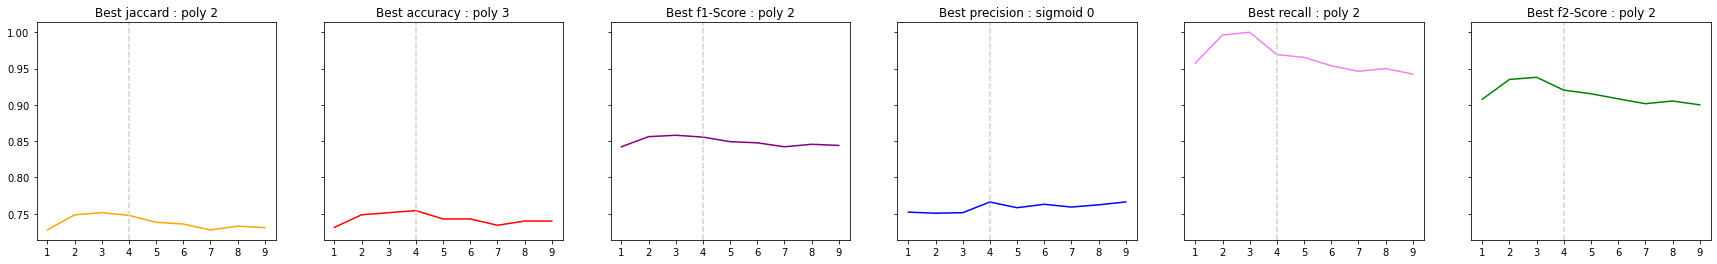

In [353]:
# visual marker for the graphs (to be updated at replay of the cell)
Xline = 4

# plot the scores with respect to the considered kernels to identify the best Kernel
fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(30,4))
axs[0].plot(range(1, Os+1), SVM_jac, 'orange')
axs[0].set_title("Best jaccard : "+Kers[np.argmax(SVM_jac)]+" "+str(Degs[np.argmax(SVM_jac)]))
axs[0].set_xticks(range(1, Os+1, 1))
axs[0].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[1].plot(range(1, Os+1), SVM_acc, 'red')
axs[1].set_title("Best accuracy : "+Kers[np.argmax(SVM_acc)]+" "+str(Degs[np.argmax(SVM_acc)]))
axs[1].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[2].plot(range(1, Os+1), SVM_f1s, 'purple')
axs[2].set_title("Best f1-Score : "+Kers[np.argmax(SVM_f1s)]+" "+str(Degs[np.argmax(SVM_f1s)]))
axs[2].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[3].plot(range(1, Os+1), SVM_pre, 'blue')
axs[3].set_title("Best precision : "+Kers[np.argmax(SVM_pre)]+" "+str(Degs[np.argmax(SVM_pre)]))
axs[3].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[4].plot(range(1, Os+1), SVM_rec, 'violet')
axs[4].set_title("Best recall : "+Kers[np.argmax(SVM_rec)]+" "+str(Degs[np.argmax(SVM_rec)]))
axs[4].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[5].plot(range(1, Os+1), SVM_f2s, 'green')
axs[5].set_title("Best f2-Score : "+Kers[np.argmax(SVM_f2s)]+" "+str(Degs[np.argmax(SVM_f2s)]))
axs[5].axvline(x=Xline, color='lightgrey', linestyle="--")
plt.show()

In [354]:
# The best setting seeme to be poly for the kernel and 2 for the degree but (as show below it give a poor model)
# degree maximize only accuracy but give a better balanced model for the two classes 0 / 1
best_SVM = svm.SVC(kernel='poly', degree=3).fit(X,y)
full_train_pred = best_SVM.predict(X)
print("Best SVM _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best SVM _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best SVM _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best SVM _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best SVM _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best SVM _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))

Best SVM _ full Train set Jaccard:  0.7717717717717718
Best SVM _ full Train set Accuracy:  0.7803468208092486
Best SVM _ full Train set f1-Score:  0.8711864406779661
Best SVM _ full Train set Precision:  0.7787878787878788
Best SVM _ full Train set Recall:  0.9884615384615385
Best SVM _ full Train set f2-Score:  0.8768656716417911


In [355]:
# Print the classification report
print(metrics.classification_report(y, full_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.15      0.25        86
           1       0.78      0.99      0.87       260

    accuracy                           0.78       346
   macro avg       0.80      0.57      0.56       346
weighted avg       0.79      0.78      0.72       346



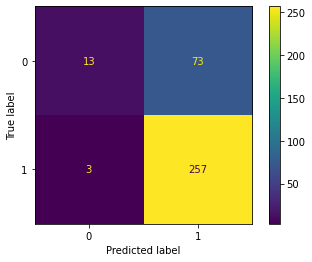

In [356]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_SVM, X, y)

In [357]:
quad_SVM = svm.SVC(kernel='poly', degree=2).fit(X,y)
full_train_pred = quad_SVM.predict(X)
print("Best SVM _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best SVM _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best SVM _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best SVM _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best SVM _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best SVM _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))

Best SVM _ full Train set Jaccard:  0.7514450867052023
Best SVM _ full Train set Accuracy:  0.7514450867052023
Best SVM _ full Train set f1-Score:  0.858085808580858
Best SVM _ full Train set Precision:  0.7514450867052023
Best SVM _ full Train set Recall:  1.0
Best SVM _ full Train set f2-Score:  0.937950937950938


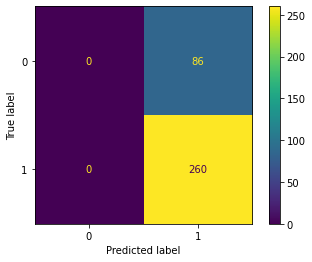

In [358]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(quad_SVM, X, y)

# Logistic Regression


In [359]:
from sklearn.linear_model import LogisticRegression

# list of solvers with list of penalties options
Sols = ["newton-cg", "newton-cg", "lbfgs", "lbfgs", "liblinear", "liblinear", "sag", "sag", "saga", "saga", "saga", "saga"]
Pens = ["l2", "none", "l2", "none", "l1", "l2", "l2", "none", "elasticnet", "l1", "l2", "none"]
# After somes trials, only the couple "saga" / "elasticnet" gives non-nul results

# testing the l1_ratio paramater in that context
l1rs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Ls = 11

# Init strorage of scores for each l
LRG_acc = np.zeros((Ls))
LRG_pre = np.zeros((Ls))
LRG_rec = np.zeros((Ls))
LRG_jac = np.zeros((Ls))
LRG_f1s = np.zeros((Ls))
LRG_f2s = np.zeros((Ls))

for l in range(1, Ls+1) :
    # Init storage of scores for each split on current d
    cross_acc = np.zeros((N))
    cross_pre = np.zeros((N))
    cross_rec = np.zeros((N))
    cross_jac = np.zeros((N))
    cross_f1s = np.zeros((N))
    cross_f2s = np.zeros((N))
    n = 0
    for train_index, val_index in skf.split(X, y) :
        # train on current train set and retrieve predictions on current validation set
        p_val = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=l1rs[l-1], max_iter=1000).fit(X[train_index], y[train_index]).predict(X[val_index])
        # Store scores on validation set for current split option
        cross_acc[n] = metrics.accuracy_score(y[val_index], p_val)
        cross_pre[n] = metrics.precision_score(y[val_index], p_val)
        cross_rec[n] = metrics.recall_score(y[val_index], p_val)
        cross_jac[n] = metrics.jaccard_score(y[val_index], p_val)
        cross_f1s[n] = metrics.f1_score(y[val_index], p_val)
        cross_f2s[n] = metrics.fbeta_score(y[val_index], p_val, beta=2)
        n = n + 1
    # caluclate the average of the stored scores on all considered split options for current k
    LRG_acc[k-1] = np.mean(cross_acc)
    LRG_pre[k-1] = np.mean(cross_pre)
    LRG_rec[k-1] = np.mean(cross_rec)
    LRG_jac[k-1] = np.mean(cross_jac)
    LRG_f1s[k-1] = np.mean(cross_f1s)
    LRG_f2s[k-1] = np.mean(cross_f2s)

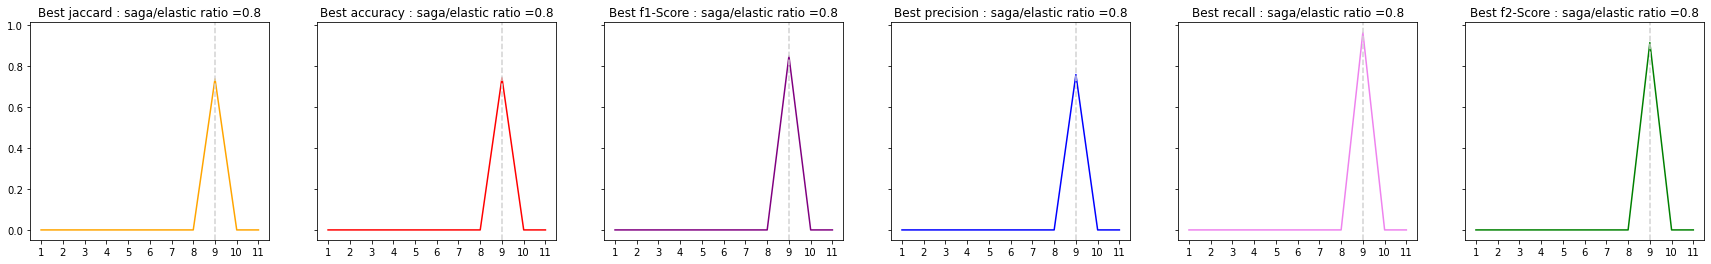

In [360]:
# visual marker for the graphs (to be updated at replay of the cell)
Xline = 9

# plot the scores with respect to the considered kernels to identify the best Kernel
fig, axs = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(30,4))
axs[0].plot(range(1, Ls+1), LRG_jac, 'orange')
axs[0].set_title("Best jaccard : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_jac)]))
axs[0].set_xticks(range(1, Ls+1, 1))
axs[0].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[1].plot(range(1, Ls+1), LRG_acc, 'red')
axs[1].set_title("Best accuracy : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_acc)]))
axs[1].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[2].plot(range(1, Ls+1), LRG_f1s, 'purple')
axs[2].set_title("Best f1-Score : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_f1s)]))
axs[2].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[3].plot(range(1, Ls+1), LRG_pre, 'blue')
axs[3].set_title("Best precision : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_pre)]))
axs[3].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[4].plot(range(1, Ls+1), LRG_rec, 'violet')
axs[4].set_title("Best recall : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_rec)]))
axs[4].axvline(x=Xline, color='lightgrey', linestyle="--")
axs[5].plot(range(1, Ls+1), LRG_f2s, 'green')
axs[5].set_title("Best f2-Score : saga/elastic ratio ="+str(l1rs[np.argmax(LRG_f2s)]))
axs[5].axvline(x=Xline, color='lightgrey', linestyle="--")
plt.show()

In [361]:
# it seems th only non-nul option is 0.8 , let us use it
best_LRG = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.8).fit(X,y)
full_train_pred = best_LRG.predict(X)
print("Best LRG _ full Train set Jaccard: ", metrics.jaccard_score(y, full_train_pred))
print("Best LRG _ full Train set Accuracy: ", metrics.accuracy_score(y, full_train_pred))
print("Best LRG _ full Train set f1-Score: ", metrics.f1_score(y, full_train_pred))
print("Best LRG _ full Train set Precision: ", metrics.precision_score(y, full_train_pred))
print("Best LRG _ full Train set Recall: ", metrics.recall_score(y, full_train_pred))
print("Best LRG _ full Train set f2-Score: ", metrics.fbeta_score(y, full_train_pred, beta=2))
print("-----------------------------------")
from sklearn.metrics import log_loss
full_train_prob = best_LRG.predict_proba(X)
print("Best LRG _ full Train set log_loss: ", metrics.log_loss(y, full_train_prob))

Best LRG _ full Train set Jaccard:  0.7405247813411079
Best LRG _ full Train set Accuracy:  0.7427745664739884
Best LRG _ full Train set f1-Score:  0.8509212730318257
Best LRG _ full Train set Precision:  0.7537091988130564
Best LRG _ full Train set Recall:  0.9769230769230769
Best LRG _ full Train set f2-Score:  0.9222948438634713
-----------------------------------
Best LRG _ full Train set log_loss:  0.43357532372807683


In [362]:
# Print the classification report
print(metrics.classification_report(y, full_train_pred))

              precision    recall  f1-score   support

           0       0.33      0.03      0.06        86
           1       0.75      0.98      0.85       260

    accuracy                           0.74       346
   macro avg       0.54      0.51      0.46       346
weighted avg       0.65      0.74      0.66       346



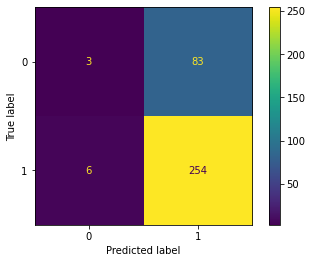

In [363]:
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_LRG, X, y)

# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [364]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-02-16 15:03:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-02-16 15:03:17 (73.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [399]:
test_df = pd.read_csv('loan_test.csv')
test_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,182.407407,182.407407,914.814815,21.888889,31.833333
std,116.220759,116.220759,174.190751,8.818220,5.992920
min,1.000000,1.000000,300.000000,7.000000,20.000000
25%,79.500000,79.500000,800.000000,15.000000,28.000000
50%,174.000000,174.000000,1000.000000,30.000000,30.500000
75%,300.250000,300.250000,1000.000000,30.000000,36.000000
max,396.000000,396.000000,1000.000000,30.000000,50.000000


In [400]:
# preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1, inplace=True)
X_test = np.array(StdScaler.transform(test_Feature))
X_test[0:5]

array([[ 0.52,  0.92,  3.16,  2.38, -1.21,  2.62, -0.88, -0.87],
       [-5.89, -1.96,  0.67, -0.42,  0.83, -0.38, -0.88, -0.87],
       [ 0.52,  0.92,  2.  ,  2.38,  0.83, -0.38,  1.14, -0.87],
       [ 0.52,  0.92, -0.82, -0.42,  0.83, -0.38, -0.88,  1.15],
       [-1.31, -0.96, -0.32, -0.42,  0.83,  2.62, -0.88, -0.87]])

Best KNN _ test set Jaccard:  0.7115384615384616
Best KNN _ test set Accuracy:  0.7222222222222222
Best KNN _ test set f1-Score:  0.8314606741573034
Best KNN _ test set Precision:  0.7551020408163265
Best KNN _ test set Recall:  0.925
Best KNN _ test set f2-Score:  0.8851674641148325


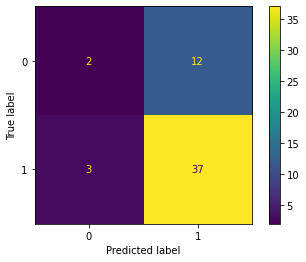

In [403]:
# Encoding of the classes
y_test = np.array(test_df['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0, 1]))

# test for the best KNN model
KNN_test_pred = best_KNN.predict(X_test)
print("Best KNN _ test set Jaccard: ", metrics.jaccard_score(y_test, KNN_test_pred))
print("Best KNN _ test set Accuracy: ", metrics.accuracy_score(y_test, KNN_test_pred))
print("Best KNN _ test set f1-Score: ", metrics.f1_score(y_test, KNN_test_pred))
print("Best KNN _ test set Precision: ", metrics.precision_score(y_test, KNN_test_pred))
print("Best KNN _ test set Recall: ", metrics.recall_score(y_test, KNN_test_pred))
print("Best KNN _ test set f2-Score: ", metrics.fbeta_score(y_test, KNN_test_pred, beta=2))

# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_KNN, X_test, y_test)

Best DTC _ test set Jaccard:  0.6530612244897959
Best DTC _ test set Accuracy:  0.6851851851851852
Best DTC _ test set f1-Score:  0.7901234567901235
Best DTC _ test set Precision:  0.7804878048780488
Best DTC _ test set Recall:  0.8
Best DTC _ test set f2-Score:  0.7960199004975125


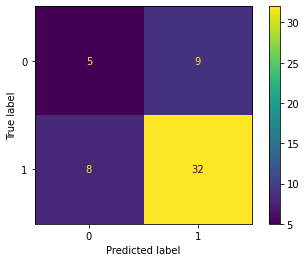

In [404]:
# test for the best DTC model
DTC_test_pred = best_DTC.predict(X_test)
print("Best DTC _ test set Jaccard: ", metrics.jaccard_score(y_test, DTC_test_pred))
print("Best DTC _ test set Accuracy: ", metrics.accuracy_score(y_test, DTC_test_pred))
print("Best DTC _ test set f1-Score: ", metrics.f1_score(y_test, DTC_test_pred))
print("Best DTC _ test set Precision: ", metrics.precision_score(y_test, DTC_test_pred))
print("Best DTC _ test set Recall: ", metrics.recall_score(y_test, DTC_test_pred))
print("Best DTC _ test set f2-Score: ", metrics.fbeta_score(y_test, DTC_test_pred, beta=2))

# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_DTC, X_test, y_test)

NoDepth DTC _ test set Jaccard:  0.6666666666666666
NoDepth DTC _ test set Accuracy:  0.7037037037037037
NoDepth DTC _ test set f1-Score:  0.8000000000000002
NoDepth DTC _ test set Precision:  0.8
NoDepth DTC _ test set Recall:  0.8
NoDepth DTC _ test set f2-Score:  0.8


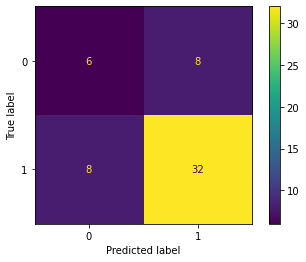

In [405]:
# test for the NoDepth DTC model
DTC_test_pred = NoDepth_DTC.predict(X_test)
print("NoDepth DTC _ test set Jaccard: ", metrics.jaccard_score(y_test, DTC_test_pred))
print("NoDepth DTC _ test set Accuracy: ", metrics.accuracy_score(y_test, DTC_test_pred))
print("NoDepth DTC _ test set f1-Score: ", metrics.f1_score(y_test, DTC_test_pred))
print("NoDepth DTC _ test set Precision: ", metrics.precision_score(y_test, DTC_test_pred))
print("NoDepth DTC _ test set Recall: ", metrics.recall_score(y_test, DTC_test_pred))
print("NoDepth DTC _ test set f2-Score: ", metrics.fbeta_score(y_test, DTC_test_pred, beta=2))

# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(NoDepth_DTC, X_test, y_test)

Best SVM _ test set Jaccard:  0.7307692307692307
Best SVM _ test set Accuracy:  0.7407407407407407
Best SVM _ test set f1-Score:  0.8444444444444444
Best SVM _ test set Precision:  0.76
Best SVM _ test set Recall:  0.95
Best SVM _ test set f2-Score:  0.9047619047619047


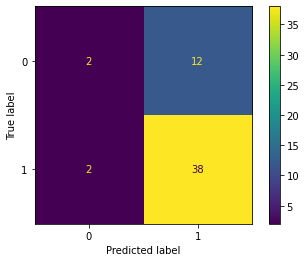

In [406]:
# test for the best SVM model
SVM_test_pred = best_SVM.predict(X_test)
print("Best SVM _ test set Jaccard: ", metrics.jaccard_score(y_test, SVM_test_pred))
print("Best SVM _ test set Accuracy: ", metrics.accuracy_score(y_test, SVM_test_pred))
print("Best SVM _ test set f1-Score: ", metrics.f1_score(y_test, SVM_test_pred))
print("Best SVM _ test set Precision: ", metrics.precision_score(y_test, SVM_test_pred))
print("Best SVM _ test set Recall: ", metrics.recall_score(y_test, SVM_test_pred))
print("Best SVM _ test set f2-Score: ", metrics.fbeta_score(y_test, SVM_test_pred, beta=2))

# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_SVM, X_test, y_test)

Best LRG _ test set Jaccard:  0.7547169811320755
Best LRG _ test set Accuracy:  0.7592592592592593
Best LRG _ test set f1-Score:  0.8602150537634409
Best LRG _ test set Precision:  0.7547169811320755
Best LRG _ test set Recall:  1.0
Best LRG _ test set f2-Score:  0.9389671361502347
------------------------------
Best LRG _ test set log_loss:  0.48105153249557153


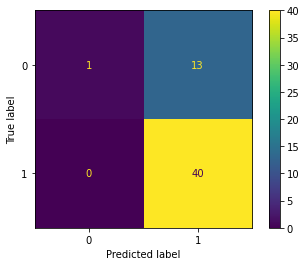

In [411]:
# test for the best LR model
LRG_test_pred = best_LRG.predict(X_test)
print("Best LRG _ test set Jaccard: ", metrics.jaccard_score(y_test, LRG_test_pred))
print("Best LRG _ test set Accuracy: ", metrics.accuracy_score(y_test, LRG_test_pred))
print("Best LRG _ test set f1-Score: ", metrics.f1_score(y_test, LRG_test_pred))
print("Best LRG _ test set Precision: ", metrics.precision_score(y_test, LRG_test_pred))
print("Best LRG _ test set Recall: ", metrics.recall_score(y_test, LRG_test_pred))
print("Best LRG _ test set f2-Score: ", metrics.fbeta_score(y_test, LRG_test_pred, beta=2))
print("------------------------------")
full_test_prob = best_LRG.predict_proba(X_test)
print("Best LRG _ test set log_loss: ", metrics.log_loss(y_test, full_test_prob))
# Compute confusion matrix with : 0 = COLLECTION / 1 = PAIDOFF
metrics.plot_confusion_matrix(best_LRG, X_test, y_test)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
